In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
mnist=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)


In [22]:
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(32,(2,2),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9033 - loss: 0.3205 - val_accuracy: 0.9818 - val_loss: 0.0547
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9859 - loss: 0.0479 - val_accuracy: 0.9877 - val_loss: 0.0385
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9904 - loss: 0.0317 - val_accuracy: 0.9856 - val_loss: 0.0438
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9925 - loss: 0.0228 - val_accuracy: 0.9898 - val_loss: 0.0336
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9950 - loss: 0.0155 - val_accuracy: 0.9894 - val_loss: 0.0348


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9869 - loss: 0.0451
0.9908000230789185
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
9


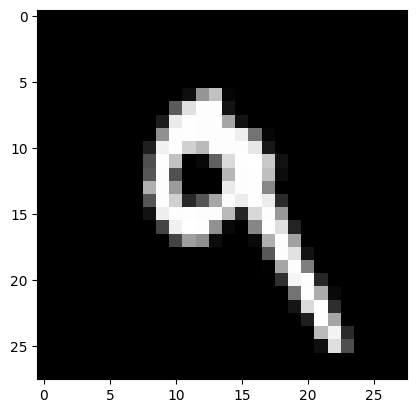

In [19]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_acc)

plt.imshow(x_test[7].reshape(28,28),cmap='gray')
pred=np.argmax(model.predict(x_test[7].reshape(1,28,28,1)))
print(pred)
